# Evaluating Your Understanding of Neural Networks

Welcome to your Lab 3! 

In todays lab, we will assess your understanding through a series of coding exercises similar to those covered in previous labs. This session is designed to test your grasp of key concepts and evaluate how well you've absorbed the material from earlier exercises. Approach each question thoughtfully and apply what you've learned to solve them effectively!

Let's get started!

## Packages

Let's first import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the main package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- np.random.seed(1) is used to keep all the random function calls consistent. It will help us grade your work. Please don't change the seed. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from test_cases import *

np.random.seed(1)

### Question 1: Initialize Parameters for a 3-Layer Neural Network
**Task:** Implement initialize_parameters_deep(layer_dims) to initialize parameters for a 3-layer neural network.


In [17]:
def initialize_parameters_deep(layer_dims):

    """
    Initializes parameters for a deep neural network.
    
    Args:
        layer_dims (list): List containing the dimensions of each layer in the network.
    
    Returns:
        dict: Dictionary containing initialized weights and biases for each layer.
              Keys should be stored as 'W1', 'W2', ..., 'WL' and 'b1', 'b2', ..., 'bL'.
    """

    ### START CODE HERE ###
    parameters={}
    for i in range(0,len(layer_dims)-1):
        parameters["W"+str(i+1)]=np.random.randn(layer_dims[i+1],layer_dims[i])
        parameters["b"+str(i+1)]=np.zeros((1,layer_dims[i]))
        
    ### END CODE HERE ###

    return parameters

In [18]:
test_initialize_parameters_deep(initialize_parameters_deep)

Test passed!


### Question 2: Normalize a NumPy Array
**Task:** Implement a function that normalizes a given NumPy array (scales values between 0 and 1).


In [21]:
def normalize_array(arr):
    """
    Normalizes an array to have values between 0 and 1.

    Args:
        arr (numpy.ndarray): Input array.

    Returns:
        norm_arr: Normalized array with values in the range [0, 1].
    """

    ### START CODE HERE ### 
    min=np.min(arr)
    max=np.max(arr)
    
    std_dev=np.std(arr)
    norm_arr=(arr)/np.sqrt(np.sum(arr**2))
    ### END CODE HERE ###

    return norm_arr

In [22]:
test_normalize_array(normalize_array)

Test passed!


### Question 3: Compute the Leaky ReLU Function
**Task:** Write a Python function to compute the leaky ReLU function for a given input value.

In [23]:
def leaky_relu(Z, alpha=0.01):
    """
    Implements the Leaky ReLU activation function.

    Args:
        Z (numpy.ndarray): Input array.
        alpha (float): Slope for negative values (default is 0.01).
    
    Returns:
        numpy.ndarray: Output after applying Leaky ReLU.
    """
    ### START CODE HERE ###
    leaky_relu=np.where(Z>=0,Z,Z*0.01)
    
    ### END CODE HERE ###

    return leaky_relu

In [24]:
test_leaky_relu(leaky_relu)

Test passed!



### Question 4: Compute Forward Propagation with Activation
**Task:** Implement linear_activation_forward(A_prev, W, b, activation) with ReLU/Sigmoid activation.

In [29]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implements the forward propagation for a single layer with a specified activation function.

    Args:
        A_prev (numpy.ndarray): Activations from the previous layer (shape: (size of previous layer, number of examples)).
        W (numpy.ndarray): Weights matrix for the current layer (shape: (size of current layer, size of previous layer)).
        b (numpy.ndarray): Bias vector for the current layer (shape: (size of current layer, 1)).
        activation (str): Activation function to use ("relu" or "sigmoid").

    Returns:
        tuple:
            - A (numpy.ndarray): Output of the activation function (shape: (size of current layer, number of examples)).
            - Z (numpy.ndarray): Linear transformation output before applying activation (shape: same as A).
    """

    ### START CODE HERE ### 
    Z=np.dot(W,A_prev)
    A=leaky_relu(Z)
    ### END CODE HERE ###

    return A, Z

In [30]:
test_linear_activation_forward(linear_activation_forward)

Test passed!


### Question 5: Implement One Iteration of Gradient Descent
**Task:** Create a function that implements a simple version of gradient descent. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [35]:
def gradient_descent(w, grad, learning_rate=0.01):
    """
    Performs one iteration of gradient descent to update weights.

    Args:
        w (numpy.ndarray): Current weight parameters (vector or matrix).
        grad (numpy.ndarray): Gradient of the loss function w.r.t weights.
        learning_rate (float, optional): Step size for weight update. Default is 0.01.

    Returns:
        w_new: Updated weight parameters after gradient step.
    """

    ### START CODE HERE ### 
    w_new=np.subtract(w,np.multiply(grad,learning_rate))
    ### END CODE HERE ###

    return w_new

In [36]:
test_gradient_descent(gradient_descent)

Test passed!


### Question 6: Compute Logistic Regression Cost Function
**Task:** Write a function to compute the binary cross-entropy for logistic regression.

In [39]:
def logistic_cost(y_true, y_pred): 

    """
    Computes the logistic (binary cross-entropy) cost function.

    Args:
        y_true (numpy.ndarray): True binary labels (shape: m,).
        y_pred (numpy.ndarray): Predicted probabilities (shape: m,).

    Returns:
        float: The computed logistic cost.
    """

    ### START CODE HERE ### 
    cost=-np.mean(np.multiply(y_true,np.log(y_pred))+np.multiply(1-y_true,np.log(1-y_pred)))
    ### END CODE HERE ###

    return cost

In [40]:
test_logistic_cost(logistic_cost)

Test passed!


### Question 7: Perform Element-wise Multiplication
**Task:** Implement a Python function to perform element-wise multiplication of two NumPy arrays.

In [41]:
def elementwise_multiply(arr1, arr2):
    """
    Performs element-wise multiplication of two NumPy arrays.

    Args:
        arr1 (numpy.ndarray): First input array.
        arr2 (numpy.ndarray): Second input array of the same shape as arr1.

    Returns:
        mul: The element-wise product of arr1 and arr2.
    """

    ### START CODE HERE ###
    mul=np.multiply(arr1,arr2)
    ### END CODE HERE ###

    return mul

In [42]:
test_elementwise_multiply(elementwise_multiply)

Test passed!


### Question 8: Plot a Decision Boundary
**Task:** Given a dataset with two features, plot a decision boundary for a logistic regression model.

In [50]:
def plot_decision_boundary(X, y):

    """
    Plots the decision boundary for a classification dataset.

    Args:
        X (numpy.ndarray): Feature matrix of shape (m, 2), where m is the number of data points.
        y (numpy.ndarray): Label vector of shape (m,), containing class labels (0 or 1).

    Returns:
        matplotlib.figure.Figure: The figure object containing the plot.
    """

    ### START CODE HERE ###
    fig,ax=plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
    ### END CODE HERE ###
    
    return plt.gcf() 

Test passed!


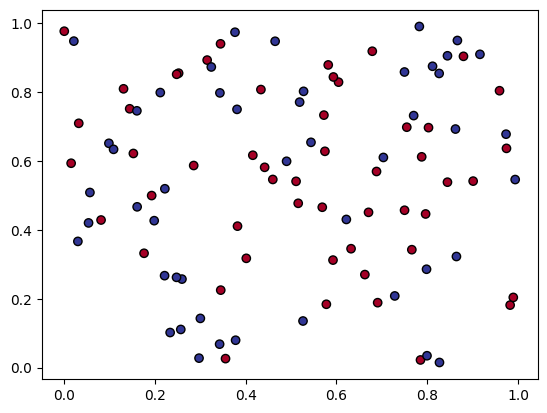

In [51]:
test_plot_decision_boundary(plot_decision_boundary)

### Question 9: Generate Identity Matrix
**Task:** Write a Python function that generates a 5x5 identity matrix using NumPy.

In [44]:
def identity_matrix():

    """
    Generates a 5x5 identity matrix.

    An identity matrix is a square matrix with ones on the main diagonal and zeros elsewhere.

    Returns:
        numpy.ndarray: A 5x5 identity matrix.
    """
        
    ### START CODE HERE ### 
    identitymatrix=np.identity(5)
    ### END CODE HERE ###

    return identitymatrix

In [45]:
test_identity_matrix(identity_matrix)

Test passed!


### Question 10: Compute Dot Product
**Task:** Implement a function to compute the dot product of two matrices using NumPy.

In [48]:
def dot_product(mat1, mat2):
    """
    Computes the dot product of two matrices.

    The dot product (matrix multiplication) is performed using NumPy's `dot()` function, 
    which follows the standard matrix multiplication rules.

    Args:
        mat1 (numpy.ndarray): First input matrix.
        mat2 (numpy.ndarray): Second input matrix.

    Returns:
        numpy.ndarray: The resulting matrix after performing the dot product.
    """
    
    ### START CODE HERE ### 
    dotproduct=np.dot(mat1,mat2)
    ### END CODE HERE ###

    return dotproduct

In [49]:
test_dot_product(dot_product)

Test passed!
